# Quiz 4 - 07 de noviembre de 2018

## Nombres: Laura y Mateo

Desarrolla una simulación de un sistema dinámico, similar más no igual al de clase, definido por una ecuación diferencial de al menos de segundo orden (¡puede ser mayor!) solucionada a través de: Euler y Runge - Kutta 4. Realiza la comparación de la solución obtenida a través de ambos métodos y concluye al respecto. Esta actividad la puedes realizar en parejas. Recuerda escribir el nombre de ambos integrantes (solo uno de los dos sube la actividad). Dicha actividad debe ser sustentada el día 9 de noviembre en el horario de clase.

In [1]:
% matplotlib nbagg 
#este comando se considera como una línea mágina, y sirve para la construcción de gráficas interactivas
import numpy as np #librería numérica
import matplotlib.pyplot as plt #librería para graficar
import matplotlib.animation as animation #librería para animaciones
plt.style.use('ggplot') #este es un estilo de gráfico diferente al usual
import math


In [2]:
#inicializamos todas las variables
dim  = 2    # dimensiones del sistema (x,y)
conteo_t = 2000# number de pasos
X    = np.zeros(dim) # posición de la partícula
Y    = np.zeros(dim) # posición de la partícula
Vx    = np.zeros(dim) # velocidad de la partícula
Vy    = np.zeros(dim) # velocidad de la partícula

Xs   = np.zeros([dim,conteo_t]) # posición de la partícula en cada instante de tiempo
Ys   = np.zeros([dim,conteo_t]) # posición de la partícula en cada instante de tiempo
Vsx   = np.zeros([dim,conteo_t]) # velocidad de la partícula en cada instante de tiempo
Vsy   = np.zeros([dim,conteo_t]) # velocidad de la partícula en cada instante de tiempo

tiempo = np.zeros(conteo_t) # vector de tiempo

In [5]:
w0 = math.sqrt(k/m)
lamda = 0.5
gamma = lamda/m
def funcY(t,x,y,v):
    return -4*math.pi**2*y/(x**2+y**2)**(3/2)
def funcX(t,x,y,v):
    return -4*math.pi**2*x/(x**2+y**2)**(3/2)


In [6]:
def iniciar(): # función para inicializar la animación
    particula.set_data([], []) #definimos un elemento de animación en blanco
    linea.set_data([], []) #definimos un elemento de animación en blanco
    titulo.set_text(r'')
    return particula,linea,titulo #retornamos la inicialización

def animar(i): # definimos la animación por el método de euler
    global X,Y,Vx,Vy,F,Xs,Ys,Vsx,Vsytiempo,h #variables globales
    tiempo[i]=i*h
    X =  X + Vx*h  
    Y =  Y + Vy*h
    Vx = Vx + h*funcX(tiempo[i],X,10,Vx)
    Vy = Vy + h*funcY(tiempo[i],10,Y,Vy)
    
  
    Xs[0:dim,i]=X #guardamos el valor para todo el tiempo
    Ys[0:dim,i]=Y #guardamos el valor para todo el tiempo
    Vsx[0:dim,i]=Vx #guardamos el valor para todo el tiempo
    Vsy[0:dim,i]=Vy #guardamos el valor para todo el tiempo
    
    particula.set_data(X[0], Y[0])  # creamos una partícula en la posición actual
    linea.set_data(Xs[0,0:i], Ys[0,0:i]) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

<IPython.core.display.Javascript object>


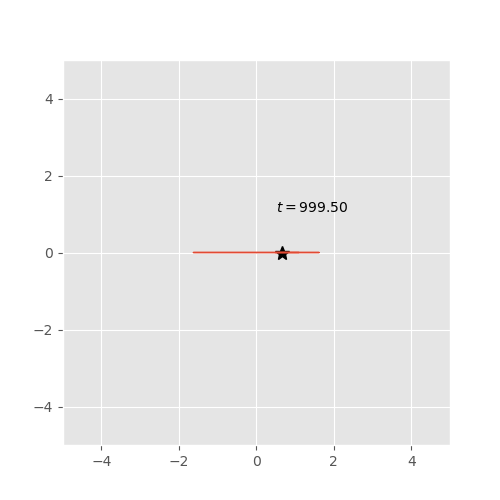

In [7]:
#corremos la función de animación
m, k = 5.0, 3.0 #masa, cte resorte, cte fricción
# establecemos las condiciones iniciales
X[0], Y[1] = 0., 0. # Rx(0), Ry(0)
Vx[0], Vy[1] = 1., 0. # Vx(0), Vy(0)
h   = 0.5 # fijamos un valor para el paso
area  = 5 # tamaño para el área de dibujo

fig, ax = plt.subplots(figsize=(5,5)) # instanciamos la figura
ax = plt.axes(xlim=(-area,area),ylim=(-area,area)) # dibujamos el rango
particula, = ax.plot([],[],'k*', ms=10) # plot para la partícula

linea,=ax.plot([],[],lw=1) # plot para la trayectoria
titulo=ax.text(0.5,1.05,r'')
anim=animation.FuncAnimation(fig,animar,init_func=iniciar,
     frames=conteo_t,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


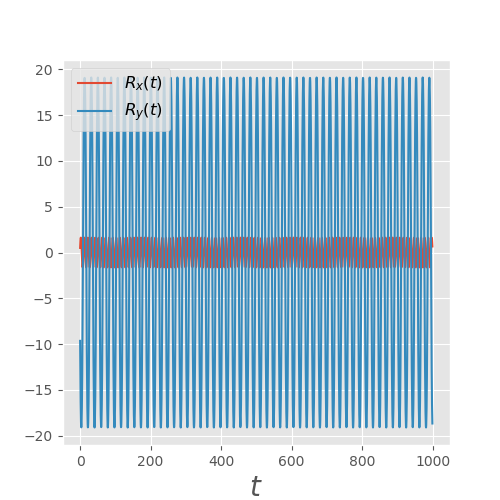

In [51]:
#Graficamos la trayectoria en x y en y
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(tiempo,Xs[0]) # plot R_x(t)
ax.plot(tiempo,Ys[0]) # plot R_y(t)
ax.legend([r'$R_x(t)$',r'$R_y(t)$'], fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


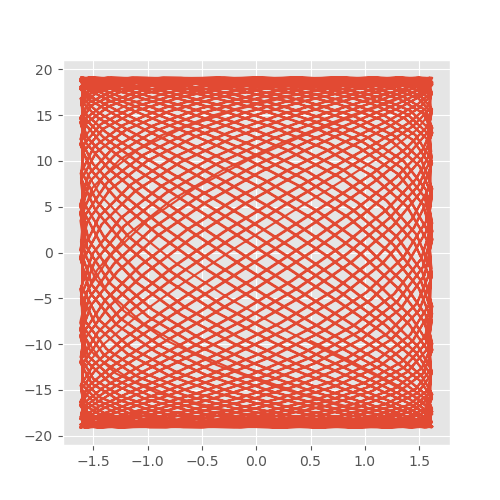

In [52]:
# se pueden hacer otro tipo de gráficas con los datos simulados
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(Xs[0], Ys[0]) #gráfica paramétrica de Rx(t) vs Ry(t)
plt.show()

In [96]:
def iniciar(): # función para inicializar la animación
    particula.set_data([], []) #definimos un elemento de animación en blanco
    linea.set_data([], []) #definimos un elemento de animación en blanco
    titulo.set_text(r'')
    return particula,linea,titulo #retornamos la inicialización

def animar(i): # definimos la animación por el método de euler
    global X,Y,V,F,Xs,Ys,Vsx,tiempo,h #variables globales
    
    tiempo[i]=i*h
    
    k1r = h*V #k1 
    k1v = h*(func(tiempo[i],k1r,k1v)) #l1 
    
    k2r = h*(V+(k1v/2))
    k2v = h*(func( tiempo[i] + h/2, X + k1r/2, V + k1v/2 ))
    #k2v = h*(func(tiempo[i]+ k1v/2, k2r,velocidad+(h/2)))
    
    k3r = h*(V+(k2v/2))
    k3v = h*(func( tiempo[i] + h/2, X + k2r/2, V + k2v/2 ))
    #k3v = h*(func(tiempo[i]+ k2v/2, k3r, velocidad+(h/2)))
    
    k4r = h*(V+(k3v/2))
    k4v = h*(func( tiempo[i] + h/2, X + k1r/2, V + k1v/2 ))
    #k4v = h*(func(tiempo[i] + k3v, k4r, velocidad+h ))
    
    
    X =  X + (1/6)*(k1r+2*k2r+2*k3r+k4r)  #solución por Euler para la ecuación (1) 
    V =  V + (1/6)*(k1v+2*k2v+2*k3v+k4v) #solución por Euler para la ecuación (2)
    Xs[0:dim,i]=X #guardamos el valor para todo el tiempo
    Vs[0:dim,i]=V #guardamos el valor para todo el tiempo
    particula.set_data(X[0], X[1])  # creamos una partícula en la posición actual
    linea.set_data(Xs[0,0:i], Xs[1,0:i]) # Creamos la línea con la última pos
    titulo.set_text(r"$t = {0:.2f}$".format(i*h))
    return particula,linea,titulo

<IPython.core.display.Javascript object>


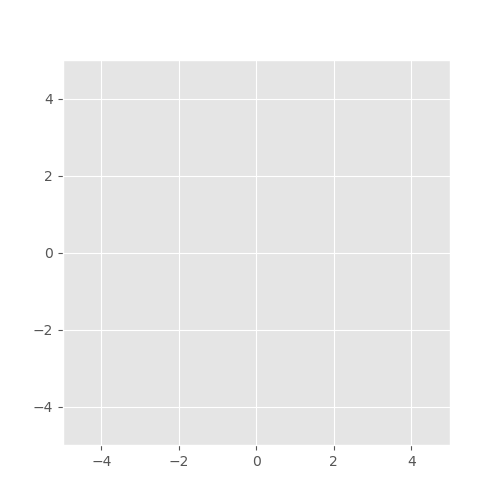

In [102]:
#corremos la función de animación
m, k = 5.0, 3.0 #masa, cte resorte, cte fricción
# establecemos las condiciones iniciales
X[0], X[1] = 0., 0. # Rx(0), Ry(0)
V[0], V[1] = 1., 0. # Vx(0), Vy(0)
h   = 0.05 # fijamos un valor para el paso
area  = 5 # tamaño para el área de dibujo

fig, ax = plt.subplots(figsize=(5,5)) # instanciamos la figura
ax = plt.axes(xlim=(-area,area),ylim=(-area,area)) # dibujamos el rango
particula, = ax.plot([],[],'k*', ms=10) # plot para la partícula

linea,=ax.plot([],[],lw=1) # plot para la trayectoria
titulo=ax.text(0.5,1.05,r'')
anim=animation.FuncAnimation(fig,animar,init_func=iniciar,
     frames=conteo_t,interval=5,blit=True,repeat=False) # draw animation
# anim.save('movie.mp4',fps=20,dpi=400)

<IPython.core.display.Javascript object>


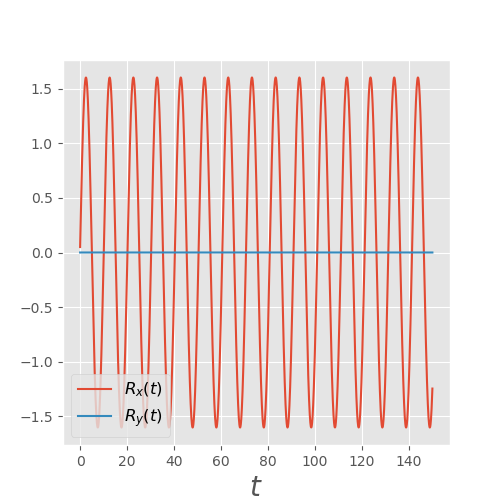

In [100]:
#Graficamos la trayectoria en x y en y
fig, ax = plt.subplots(figsize=(5,5))
ax.set_xlabel(r"$t$", fontsize=20)
ax.plot(tiempo,Xs[0]) # plot R_x(t)
ax.plot(tiempo,Xs[1]) # plot R_y(t)
ax.legend([r'$R_x(t)$',r'$R_y(t)$'], fontsize=12)
plt.show()

<IPython.core.display.Javascript object>


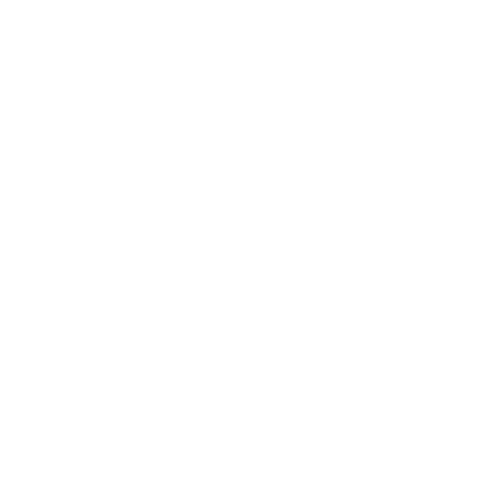

NameError: name 'Rs' is not defined

In [101]:
# se pueden hacer otro tipo de gráficas con los datos simulados
fig, ax = plt.subplots(figsize=(5,5))
ax.plot(Rs[0], Rs[1]) #gráfica paramétrica de Rx(t) vs Ry(t)
plt.show()